In [1]:
import numpy as np
import pandas as pd
import pygrgl
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

import sys
sys.path.append('/Users/adityasyam/compgen/grg_pheno_sim') 

from grg_pheno_sim.effect_size import sim_grg_causal_mutation, additive_effect_sizes, samples_to_individuals
from grg_pheno_sim.model import grg_causal_mutation_model
from grg_pheno_sim.noise_sim import sim_env_noise
from grg_pheno_sim.normalization import quantile_normalize



In [2]:
grg_1 = pygrgl.load_immutable_grg("test-200-samples.vcf.gz.final.grg") #loading in a sample grg stored in the same directory


First, we demonstrate quantile normalization for single causal mutation's phenotypic dataframe.

In [3]:
mean_1 = 0.0  
var_1 = 1.0  
model_normal = grg_causal_mutation_model("normal", mean=mean_1, var=var_1)

In [4]:

trait_df_normal = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal, random_seed=1)
sample_nodes_df = additive_effect_sizes(grg_1, trait_df_normal)
individual_genetic_value_df = samples_to_individuals(sample_nodes_df) #non-normalized genetic value df
phenotypes = sim_env_noise(individual_genetic_value_df, h2=0.5) #simulating environmental noise without normalizing genetic values
phenotype_df = phenotypes.phenotype_df
phenotype_df_1 = phenotype_df.copy()
phenotype_df_2 = phenotype_df.copy()
phenotype_df


,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,-15.227789,-34.599144,-49.826934
1,0,1,-14.879777,-4.281349,-19.161127
2,0,2,11.834985,-2.799128,9.035857
3,0,3,-3.905829,29.064675,25.158846
4,0,4,-20.240681,-2.177704,-22.418385
...,...,...,...,...,...
195,0,195,-9.480552,5.918032,-3.562519
196,0,196,-5.815569,-7.697584,-13.513153
197,0,197,-20.099029,0.110831,-19.988198
198,0,198,10.132382,13.748798,23.881181


In [5]:
quantile_normalize_phenotype_df = quantile_normalize(phenotype_df) #quantile normalized to the normal distribution
quantile_normalize_phenotype_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,-15.227789,-34.599144,-49.826934,-2.575829
1,0,1,-14.879777,-4.281349,-19.161127,-1.036433
2,0,2,11.834985,-2.799128,9.035857,0.412463
3,0,3,-3.905829,29.064675,25.158846,1.372204
4,0,4,-20.240681,-2.177704,-22.418385,-1.253565
...,...,...,...,...,...,...
195,0,195,-9.480552,5.918032,-3.562519,-0.253347
196,0,196,-5.815569,-7.697584,-13.513153,-0.772193
197,0,197,-20.099029,0.110831,-19.988198,-1.058122
198,0,198,10.132382,13.748798,23.881181,1.226528


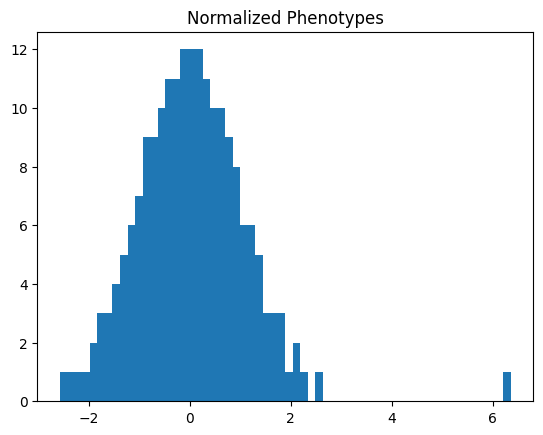

Mean of phenotypes: 0.03180670444848711
Standard deviation of phenotypes: 1.0757478165020662


In [6]:
plt.hist(quantile_normalize_phenotype_df["normalized_phenotype"], bins=60)
plt.title("Normalized Phenotypes")
plt.show()
print("Mean of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].mean()))
print("Standard deviation of phenotypes: " + str(quantile_normalize_phenotype_df['normalized_phenotype'].std()))

In [7]:
quantile_normal_genetic_df = quantile_normalize(phenotype_df_1, phenotype_normalize=False)
quantile_normal_genetic_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,-15.227789,-34.599144,-49.826934,-1.226528
1,0,1,-14.879777,-4.281349,-19.161127,-1.150349
2,0,2,11.834985,-2.799128,9.035857,0.806421
3,0,3,-3.905829,29.064675,25.158846,-0.412463
4,0,4,-20.240681,-2.177704,-22.418385,-1.750686
...,...,...,...,...,...,...
195,0,195,-9.480552,5.918032,-3.562519,-0.772193
196,0,196,-5.815569,-7.697584,-13.513153,-0.510073
197,0,197,-20.099029,0.110831,-19.988198,-1.695398
198,0,198,10.132382,13.748798,23.881181,0.658838


In [8]:
quantile_both_normalized = quantile_normalize(phenotype_df_2, normalize_both=True)
quantile_both_normalized

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value,normalized_phenotype
0,0,0,-15.227789,-34.599144,-49.826934,-1.226528,-2.575829
1,0,1,-14.879777,-4.281349,-19.161127,-1.150349,-1.036433
2,0,2,11.834985,-2.799128,9.035857,0.806421,0.412463
3,0,3,-3.905829,29.064675,25.158846,-0.412463,1.372204
4,0,4,-20.240681,-2.177704,-22.418385,-1.750686,-1.253565
...,...,...,...,...,...,...,...
195,0,195,-9.480552,5.918032,-3.562519,-0.772193,-0.253347
196,0,196,-5.815569,-7.697584,-13.513153,-0.510073,-0.772193
197,0,197,-20.099029,0.110831,-19.988198,-1.695398,-1.058122
198,0,198,10.132382,13.748798,23.881181,0.658838,1.226528


Now, we show the same for multivariate simulation.

In [9]:
mean_1 = np.zeros(2)
cov_1 = np.eye(2) 
model_normal_multi = grg_causal_mutation_model("multivariate normal", mean=mean_1, cov=cov_1)



In [10]:
trait_df_normal_multi = sim_grg_causal_mutation(grg_1, num_causal=1000, model=model_normal_multi, random_seed=1)
sample_nodes_df_multi = additive_effect_sizes(grg_1, trait_df_normal_multi)
individuals = samples_to_individuals(sample_nodes_df_multi)
phenotypes_user_defined_multi_normal = sim_env_noise(individuals, user_defined=True, means=mean_1, cov=cov_1) #simulates noise from the multivariate standard normal distribution with means of zero and an identity matrix for covariance
phenotypes_user_defined_multi_normal_df = phenotypes_user_defined_multi_normal.phenotype_df
phenotypes_user_defined_multi_normal_df_1 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df_2 = phenotypes_user_defined_multi_normal_df.copy()
phenotypes_user_defined_multi_normal_df

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype
0,0,0,6.275564,1.152221,7.427785
1,1,0,18.213929,-0.096910,18.117019
2,0,1,-7.378554,0.408092,-6.970462
3,1,1,15.733599,0.565235,16.298833
4,0,2,9.299456,-2.142305,7.157151
...,...,...,...,...,...
395,1,197,-11.275729,-0.491580,-11.767309
396,0,198,23.609482,0.548772,24.158254
397,1,198,6.534328,0.128012,6.662340
398,0,199,23.023712,0.883475,23.907186


In [11]:
quantile_normalized_multi_pheno = quantile_normalize(phenotypes_user_defined_multi_normal_df)
quantile_normalized_multi_pheno

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,6.275564,1.152221,7.427785,0.755415
1,1,0,18.213929,-0.096910,18.117019,1.150349
2,0,1,-7.378554,0.408092,-6.970462,-0.568051
3,1,1,15.733599,0.565235,16.298833,0.934589
4,0,2,9.299456,-2.142305,7.157151,0.738847
...,...,...,...,...,...,...
395,1,197,-11.275729,-0.491580,-11.767309,-1.405072
396,0,198,23.609482,0.548772,24.158254,6.361341
397,1,198,6.534328,0.128012,6.662340,0.075270
398,0,199,23.023712,0.883475,23.907186,2.575829


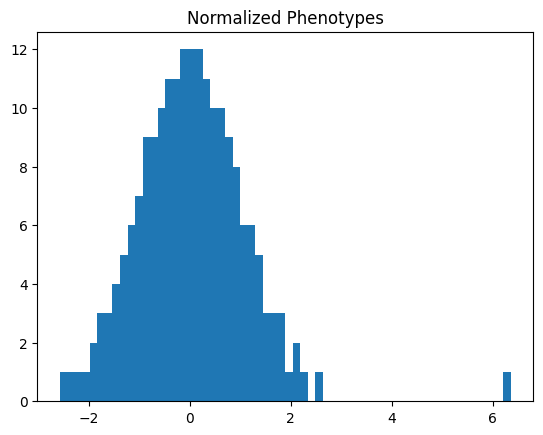

Mean of phenotypes: 0.031806704448487086
Standard deviation of phenotypes: 1.0757478165020662


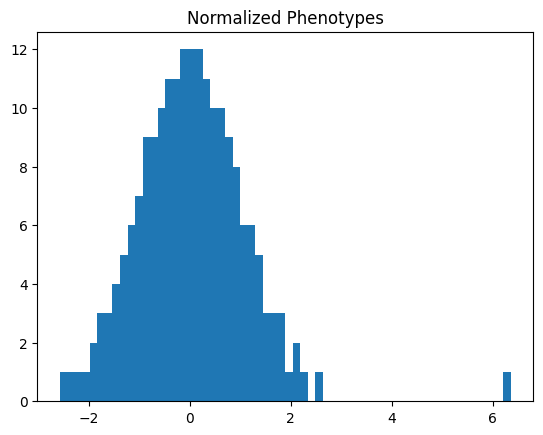

Mean of phenotypes: 0.03180670444848708
Standard deviation of phenotypes: 1.0757478165020662


In [12]:
df_dict_test = {k: v.sort_values('individual_id') for k, v in quantile_normalized_multi_pheno.groupby('causal_mutation_id')}

num = len(df_dict_test)

for i in range(num):
  temp_df = df_dict_test[i]
  plt.hist(temp_df["normalized_phenotype"], bins=60)
  plt.title("Normalized Phenotypes")
  plt.show()
  print("Mean of phenotypes: " + str(temp_df['normalized_phenotype'].mean()))
  print("Standard deviation of phenotypes: " + str(temp_df['normalized_phenotype'].std()))

In [13]:
quantile_normalized_multi_genetic = quantile_normalize(phenotypes_user_defined_multi_normal_df_1, phenotype_normalize=False)
quantile_normalized_multi_genetic

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_genetic_value
0,0,0,6.275564,1.152221,7.427785,0.658838
1,1,0,18.213929,-0.096910,18.117019,1.150349
2,0,1,-7.378554,0.408092,-6.970462,-0.643345
3,1,1,15.733599,0.565235,16.298833,0.896473
4,0,2,9.299456,-2.142305,7.157151,0.896473
...,...,...,...,...,...,...
395,1,197,-11.275729,-0.491580,-11.767309,-1.310579
396,0,198,23.609482,0.548772,24.158254,6.361341
397,1,198,6.534328,0.128012,6.662340,0.113039
398,0,199,23.023712,0.883475,23.907186,2.575829


In [14]:
quantile_normalized_multi_both = quantile_normalize(phenotypes_user_defined_multi_normal_df_2, normalize_both=False)
quantile_normalized_multi_both

,causal_mutation_id,individual_id,genetic_value,environmental_noise,phenotype,normalized_phenotype
0,0,0,6.275564,1.152221,7.427785,0.755415
1,1,0,18.213929,-0.096910,18.117019,1.150349
2,0,1,-7.378554,0.408092,-6.970462,-0.568051
3,1,1,15.733599,0.565235,16.298833,0.934589
4,0,2,9.299456,-2.142305,7.157151,0.738847
...,...,...,...,...,...,...
395,1,197,-11.275729,-0.491580,-11.767309,-1.405072
396,0,198,23.609482,0.548772,24.158254,6.361341
397,1,198,6.534328,0.128012,6.662340,0.075270
398,0,199,23.023712,0.883475,23.907186,2.575829
